In [1]:
import numpy as np
import pandas as pd
from PIL import Image
import cv2
import os
import random
import subprocess
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from numpy import asarray
import tensorflow as tf
from tensorflow.keras import layers, models, Input, Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense ,GlobalAveragePooling2D
import warnings
warnings.filterwarnings("ignore")

In [2]:
directory = "input/dlcv-dataset1/Revitsone-5classes/"
folders = ["other_activities" , "safe_driving" , "talking_phone" , "texting_phone" , "turning", "sleepy"]
other_activities_img = []
safe_driving_img = []
talking_phone_img = []
texting_phone_img = []
turning_img = []
sleepy_img = []
for imgother in os.listdir(directory + folders[0]):
     if imgother.endswith(".jpg") or imgother.endswith(".png"):
          other_activities_img.append(os.path.join("input/dlcv-dataset1/Revitsone-5classes/other_activities",imgother))

for imgsafe in os.listdir(directory + folders[1]):
     if imgsafe.endswith(".jpg") or imgsafe.endswith(".png"):
          safe_driving_img.append(os.path.join("input/dlcv-dataset1/Revitsone-5classes/safe_driving",imgsafe))

for imgtalk in os.listdir(directory + folders[2]):
     if imgtalk.endswith(".jpg") or imgtalk.endswith(".png"):
          talking_phone_img.append(os.path.join("input/dlcv-dataset1/Revitsone-5classes/talking_phone",imgtalk))

for imgtext in os.listdir(directory + folders[3]):
     if imgtext.endswith(".jpg") or imgtext.endswith(".png"):
          texting_phone_img.append(os.path.join("input/dlcv-dataset1/Revitsone-5classes/texting_phone",imgtext))

for imgturn in os.listdir(directory + folders[4]):
     if imgturn.endswith(".jpg") or imgturn.endswith(".png"):
          turning_img.append(os.path.join("input/dlcv-dataset1/Revitsone-5classes/turning",imgturn))

for imgsleep in os.listdir(directory + folders[5]):
    if imgsleep.endswith(".jpg") or imgturn.endswith(".png"):
          sleepy_img.append(os.path.join("input/dlcv-dataset1/Revitsone-5classes/sleepy", imgsleep))

In [3]:
def detect_JPG_PNG(path , name):
    JPG = []
    PNG = []
    for img in path :

            if img.split('.')[1] == 'jpg':
                JPG.append(img)
            else:
                PNG.append(img)

    print(f'The folder name is : {name}')
    print(f'The number of all images : {len(path)}')
    print(f'The number of images with jpg format is : {len(JPG)}')
    print(f'The number of images with png format is : {len(PNG)}')

In [4]:
#defect_images_other_activities = ['img_13625.jpg' ,'img_20398.jpg' , 'img_22266.jpg']
defect_images_other_activities = ['img_13625.jpg' ,'img_20398.jpg']
defect_images_turning = ['img_8771.jpg' , 'img_62337.jpg' , 'img_67523.jpg' , 'img_70552.jpg','img_84605.jpg' , 'img_101434.jpg']

print(f'The number of flawed images in other activities folder is : {len(defect_images_other_activities)}')
print(f'The number of flawed images in turning folder is : {len(defect_images_turning)}')
print('--'*20)

for img in defect_images_other_activities :
    print('Images from : other_activities\n')
    remove_img = 'input/dlcv-dataset1/Revitsone-5classes/other_activities/' + img
    print(f'file which has been deleted is : {remove_img}')
    other_activities_img.remove(remove_img)

print('--' * 40 )
for img in defect_images_turning :
    print('Images from : turning\n')
    remove_img = 'input/dlcv-dataset1/Revitsone-5classes/turning/' + img
    print(f'file which has been deleted is : {remove_img}')
    turning_img.remove(remove_img)

The number of flawed images in other activities folder is : 2
The number of flawed images in turning folder is : 6
----------------------------------------
Images from : other_activities

file which has been deleted is : input/dlcv-dataset1/Revitsone-5classes/other_activities/img_13625.jpg
Images from : other_activities

file which has been deleted is : input/dlcv-dataset1/Revitsone-5classes/other_activities/img_20398.jpg
--------------------------------------------------------------------------------
Images from : turning

file which has been deleted is : input/dlcv-dataset1/Revitsone-5classes/turning/img_8771.jpg
Images from : turning

file which has been deleted is : input/dlcv-dataset1/Revitsone-5classes/turning/img_62337.jpg
Images from : turning

file which has been deleted is : input/dlcv-dataset1/Revitsone-5classes/turning/img_67523.jpg
Images from : turning

file which has been deleted is : input/dlcv-dataset1/Revitsone-5classes/turning/img_70552.jpg
Images from : turning

fil

In [5]:
import shutil
import os

def copy_dataset_to_writable_dir(src_dir, dst_dir):
    if not os.path.exists(dst_dir):
        os.makedirs(dst_dir)
    for root, dirs, files in os.walk(src_dir):
        # Create corresponding subdirectory in destination
        relative_path = os.path.relpath(root, src_dir)
        dst_subdir = os.path.join(dst_dir, relative_path)
        if not os.path.exists(dst_subdir):
            os.makedirs(dst_subdir)
        # Copy each file to the new directory
        for file in files:
            shutil.copy(os.path.join(root, file), os.path.join(dst_subdir, file))
            print(f"Copied {file} to {dst_subdir}")

# Specify source and destination directories
src_dir = 'input/dlcv-dataset1/Revitsone-5classes'
dst_dir = 'working/Revitsone-5classes'
copy_dataset_to_writable_dir(src_dir, dst_dir)


Copied .DS_Store to working/Revitsone-5classes/.
Copied img_29207.jpg to working/Revitsone-5classes/texting_phone
Copied img_28119.jpg to working/Revitsone-5classes/texting_phone
Copied img_14186.jpg to working/Revitsone-5classes/texting_phone
Copied img_18964.jpg to working/Revitsone-5classes/texting_phone
Copied img_41805.jpg to working/Revitsone-5classes/texting_phone
Copied img_18794.jpg to working/Revitsone-5classes/texting_phone
Copied img_25398.jpg to working/Revitsone-5classes/texting_phone
Copied img_12520.jpg to working/Revitsone-5classes/texting_phone
Copied img_17458.jpg to working/Revitsone-5classes/texting_phone
Copied img_15501.jpg to working/Revitsone-5classes/texting_phone
Copied img_37978.jpg to working/Revitsone-5classes/texting_phone
Copied img_6459.jpg to working/Revitsone-5classes/texting_phone
Copied img_46159.jpg to working/Revitsone-5classes/texting_phone
Copied img_39941.jpg to working/Revitsone-5classes/texting_phone
Copied img_26861.jpg to working/Revitsone-

In [7]:

directory = "working/Revitsone-5classes/"
folders = ["other_activities" , "safe_driving" , "talking_phone" , "texting_phone" , "turning", "sleepy"]
other_activities_img = []
safe_driving_img = []
talking_phone_img = []
texting_phone_img = []
turning_img = []
sleepy_img = []
for imgother in os.listdir(directory + folders[0]):
     if imgother.endswith(".jpg") or imgother.endswith(".png"):
            other_activities_img.append(os.path.join("input/dlcv-dataset1/Revitsone-5classes/other_activities",imgother))

for imgsafe in os.listdir(directory + folders[1]):
     if imgsafe.endswith(".jpg") or imgsafe.endswith(".png"):
            safe_driving_img.append(os.path.join("input/dlcv-dataset1/Revitsone-5classes/safe_driving",imgsafe))

for imgtalk in os.listdir(directory + folders[2]):
     if imgtalk.endswith(".jpg") or imgtalk.endswith(".png"):
            talking_phone_img.append(os.path.join("input/dlcv-dataset1/Revitsone-5classes/talking_phone",imgtalk))

for imgtext in os.listdir(directory + folders[3]):
     if imgtext.endswith(".jpg") or imgtext.endswith(".png"):
            texting_phone_img.append(os.path.join("input/dlcv-dataset1/Revitsone-5classes/texting_phone",imgtext))

for imgturn in os.listdir(directory + folders[4]):
     if imgturn.endswith(".jpg") or imgturn.endswith(".png"):
            turning_img.append(os.path.join("input/dlcv-dataset1/Revitsone-5classes/turning",imgturn))

for imgsleep in os.listdir(directory + folders[5]):
    if imgsleep.endswith(".jpg") or imgturn.endswith(".png"):
        sleepy_img.append(os.path.join("input/dlcv-dataset1/Revitsone-5classes/sleepy", imgsleep))

In [16]:
# from PIL import Image

# def convert_to_rgb_jpeg_in_writable_dir(dataframe, img_column, root_dir):
#     for idx, row in dataframe.iterrows():
#         img_path = os.path.join(root_dir, row[img_column])
#         try:
#             with Image.open(img_path) as img:
#                 if img.mode != 'RGB' or not img_path.endswith('.jpg'):
#                     # Convert to RGB and save as JPEG
#                     rgb_img = img.convert('RGB')
#                     new_img_path = os.path.splitext(img_path)[0] + '.jpg'
#                     rgb_img.save(new_img_path, 'JPEG')
#                     dataframe.at[idx, img_column] = new_img_path  # Update path in dataframe
#                     os.remove(img_path)  # Remove the original file
#                     print(f"Converted {img_path} to {new_img_path}")
#         except Exception as e:
#             print(f"Error converting {img_path}: {e}")

# # Update the paths in the dataframe to point to the new writable directory
# Train_df_all['Img'] = Train_df_all['Img'].apply(lambda x: os.path.join(dst_dir, os.path.relpath(x, src_dir)))
# Valid_df_all['Img'] = Valid_df_all['Img'].apply(lambda x: os.path.join(dst_dir, os.path.relpath(x, src_dir)))
# Test_df_all['Img'] = Test_df_all['Img'].apply(lambda x: os.path.join(dst_dir, os.path.relpath(x, src_dir)))

# # Apply the conversion to each dataframe
# convert_to_rgb_jpeg_in_writable_dir(Train_df_all, 'Img', dst_dir)
# convert_to_rgb_jpeg_in_writable_dir(Valid_df_all, 'Img', dst_dir)
# convert_to_rgb_jpeg_in_writable_dir(Test_df_all, 'Img', dst_dir)


In [8]:
detect_JPG_PNG(path = other_activities_img, name='other activities')
print("\n")
detect_JPG_PNG(path = safe_driving_img, name='safe_driving')
print("\n")
detect_JPG_PNG(path = talking_phone_img  , name = 'talking_phone')
print("\n")
detect_JPG_PNG(path = texting_phone_img , name = 'texting')
print("\n")
detect_JPG_PNG(path = turning_img  , name = 'turning')
print("\n")
detect_JPG_PNG(path = sleepy_img  , name = 'sleepy')

The folder name is : other activities
The number of all images : 2142
The number of images with jpg format is : 2101
The number of images with png format is : 41


The folder name is : safe_driving
The number of all images : 2227
The number of images with jpg format is : 2203
The number of images with png format is : 24


The folder name is : talking_phone
The number of all images : 2193
The number of images with jpg format is : 2169
The number of images with png format is : 24


The folder name is : texting
The number of all images : 2217
The number of images with jpg format is : 2203
The number of images with png format is : 14


The folder name is : turning
The number of all images : 2124
The number of images with jpg format is : 2063
The number of images with png format is : 61


The folder name is : sleepy
The number of all images : 2328
The number of images with jpg format is : 2304
The number of images with png format is : 24


In [9]:
def show_images(path , seed , kind ):
    random.seed(seed)
    Random_Image_Path = random.choices(path , k=6)
    plt.style.use('dark_background')
    plt.figure(figsize=(13 ,10))
    plt.suptitle(kind  , fontsize=15 ,fontstyle='italic' , c='black' , backgroundcolor = 'white' )
    for i, images in enumerate(Random_Image_Path):
        plt.subplot(3,2,i+1)
        img = Image.open(images)
#         plt.axis('off')
        plt.title(f'size : ({img.width} ,{img.height} )')
        plt.imshow(img)

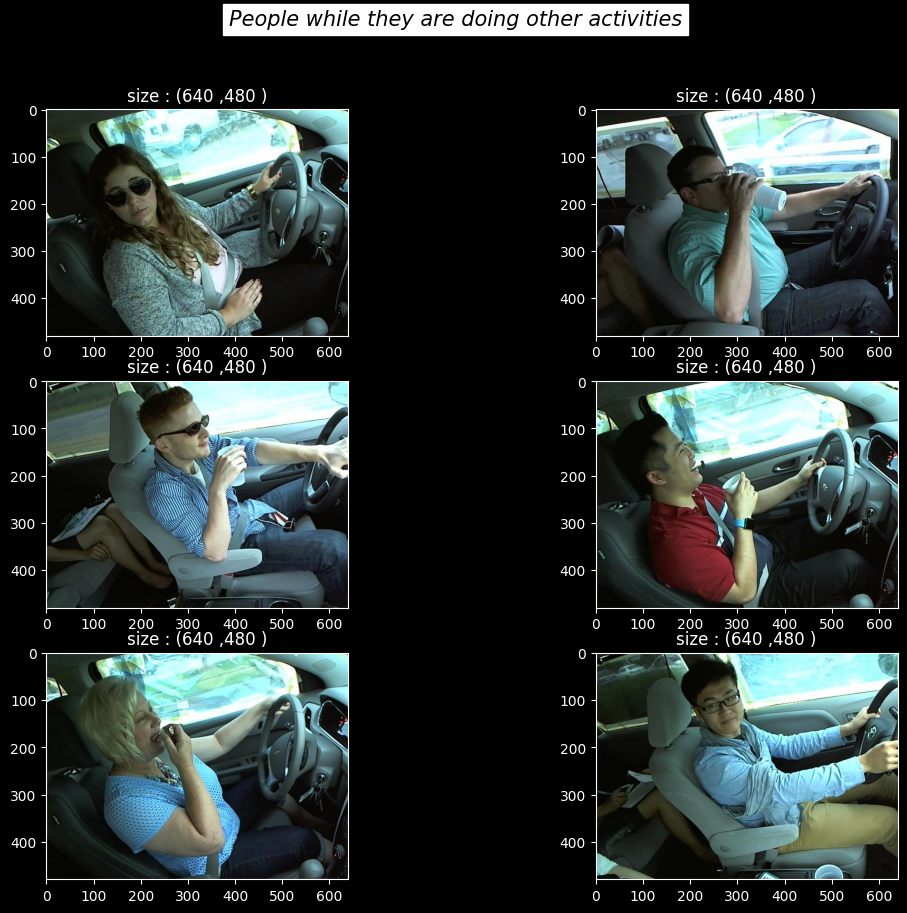

In [10]:
show_images(path = other_activities_img , seed = 42 , kind='People while they are doing other activities' )

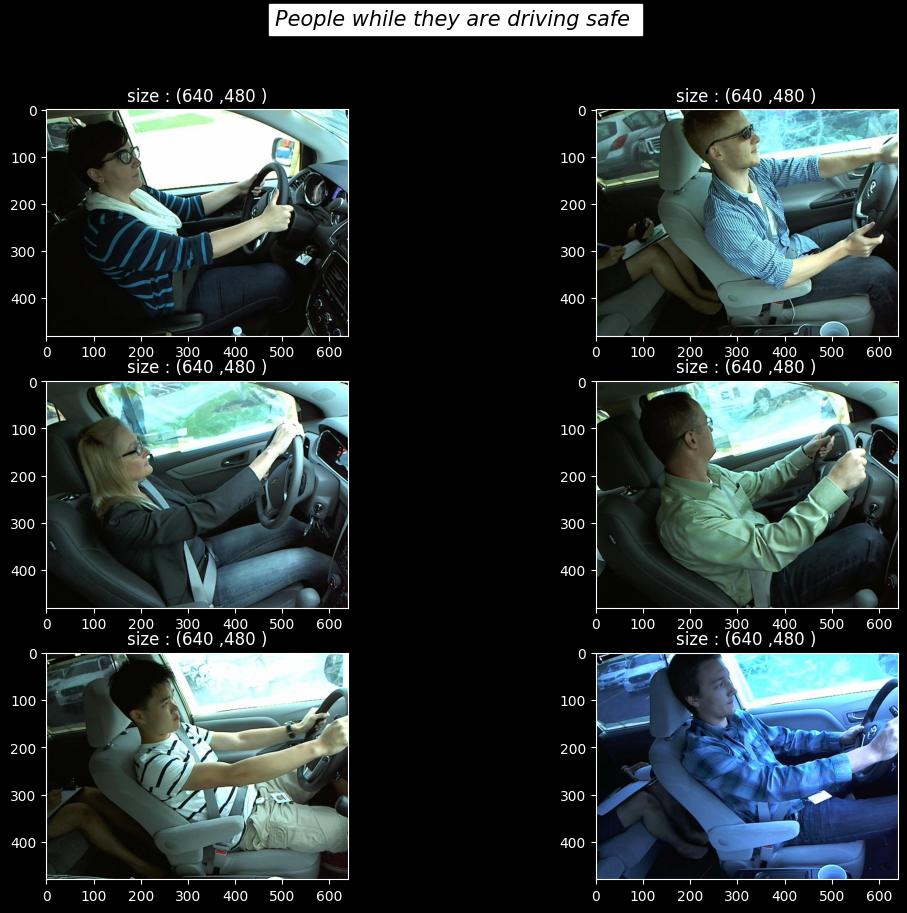

In [11]:
show_images(path = safe_driving_img , seed = 42 , kind='People while they are driving safe ' )

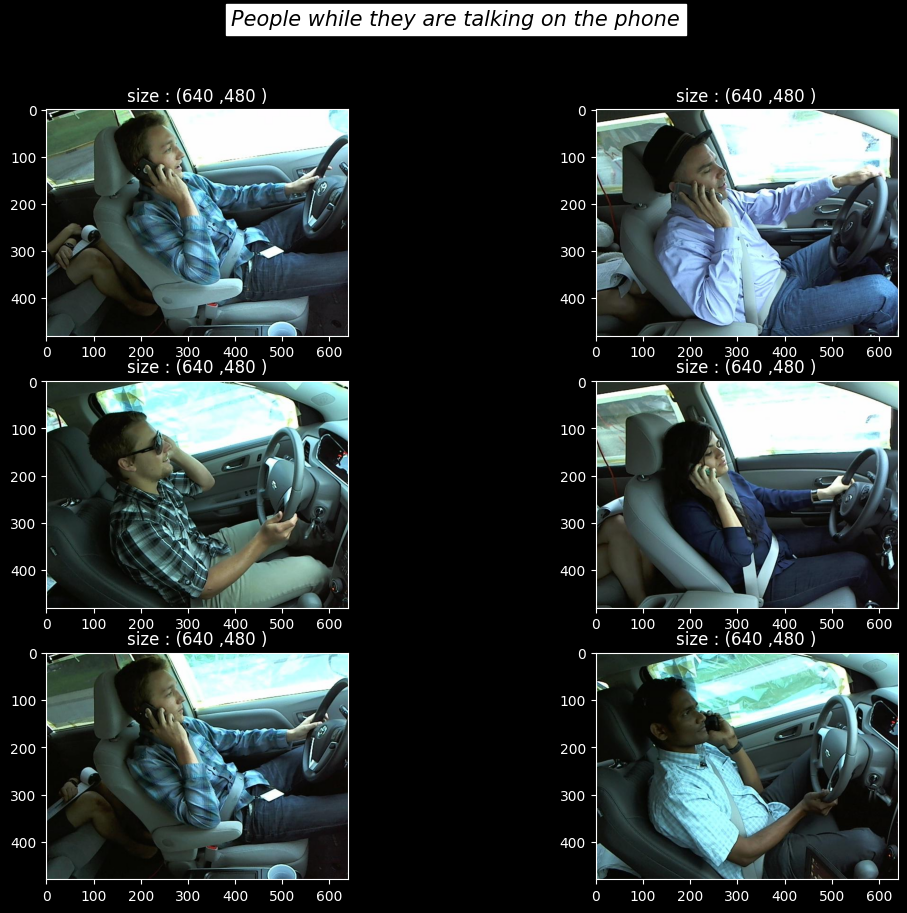

In [12]:
show_images(path = talking_phone_img , seed = 42 , kind='People while they are talking on the phone' )

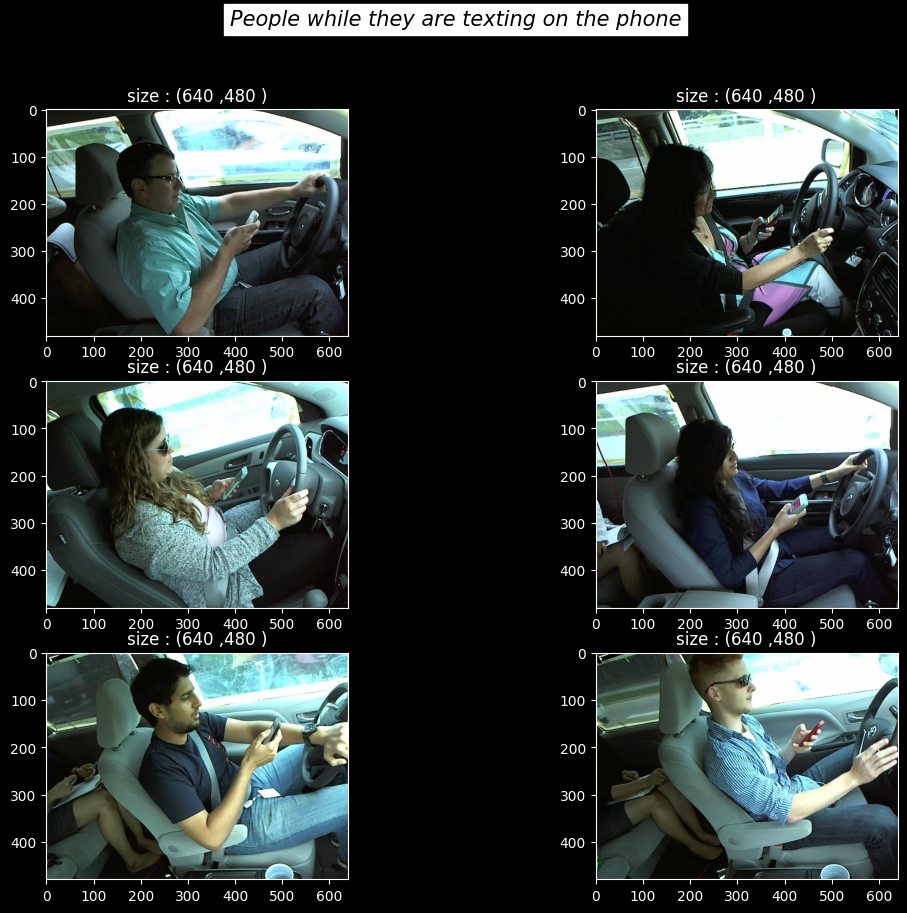

In [13]:
show_images(path = texting_phone_img , seed = 42 , kind='People while they are texting on the phone' )

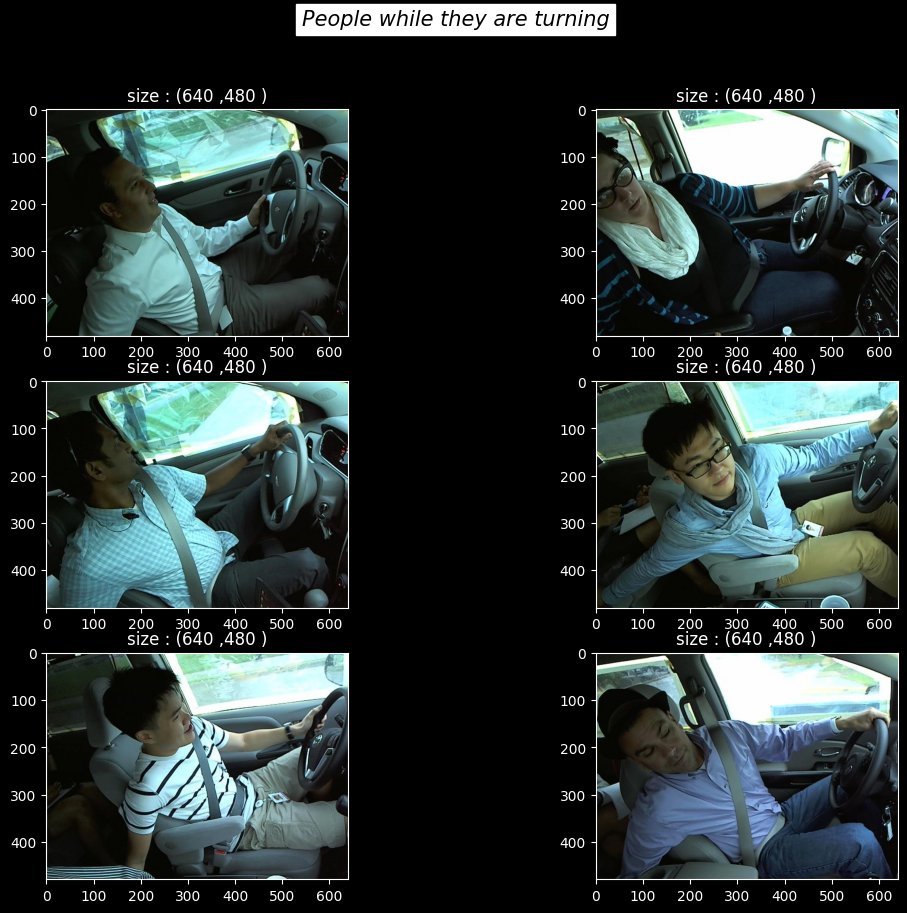

In [14]:
show_images(path = turning_img , seed = 42 , kind='People while they are turning' )

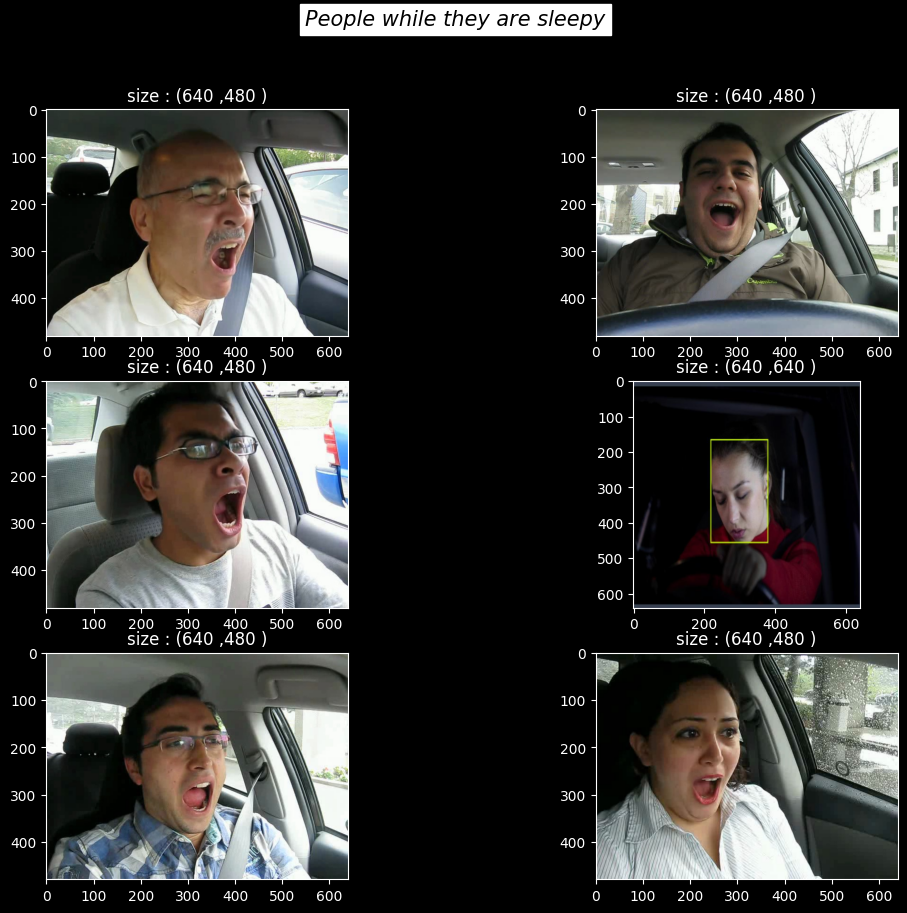

In [15]:
show_images(path = sleepy_img , seed = 42 , kind='People while they are sleepy' )

In [16]:
train_other_activities  ,  test_other_activities   , valid_other_activities= [] , [] ,[]


train_drive_safe ,  test_drive_safe  , valid_drive_safe = [] , [] ,[]


train_talking  ,  test_talking   , valid_talking = [] , [] , []


train_texting  ,  test_texting   , valid_texting= [] , [] ,[]


train_turning  ,  test_turning   , valid_turning= [] , [] ,[]

train_sleepy  ,  test_sleepy   , valid_sleepy= [] , [] ,[]

def train_test_validation(data , Train , Test , Valid , Name ):

    Len = len(data)
    train_num = int( Len * 0.70)
    test_num = int(Len * 0.15)
    valid_num = int(Len * 0.15)

    n_t = train_num + test_num
    Train.extend(data[:train_num])
    Test.extend(data[train_num : n_t])
    Valid.extend(data[n_t :])




    print(f'Name : {Name}')
    print(f'Number of all images : {Len}')
    print(f'Train(85%) : {len(Train)}')
    print(f'Test(10%) :{len(Test)}')
    print(f'Valid(5%) : {len(Valid)}')

In [17]:
train_test_validation(data = other_activities_img , Train=train_other_activities , Test=test_other_activities , Valid=valid_other_activities , Name='Other_activities')

Name : Other_activities
Number of all images : 2142
Train(85%) : 1499
Test(10%) :321
Valid(5%) : 322


In [18]:
train_test_validation(data = safe_driving_img , Train=train_drive_safe , Test=test_drive_safe , Valid=valid_drive_safe , Name='Driving safe')

Name : Driving safe
Number of all images : 2227
Train(85%) : 1558
Test(10%) :334
Valid(5%) : 335


In [19]:
train_test_validation(data = talking_phone_img, Train=train_talking , Test=test_talking , Valid=valid_talking, Name='Talking on the phone')

Name : Talking on the phone
Number of all images : 2193
Train(85%) : 1535
Test(10%) :328
Valid(5%) : 330


In [20]:
train_test_validation(data = texting_phone_img , Train=train_texting , Test=test_texting , Valid=valid_texting , Name='Texting on the phone')

Name : Texting on the phone
Number of all images : 2217
Train(85%) : 1551
Test(10%) :332
Valid(5%) : 334


In [21]:
train_test_validation(data = turning_img , Train=train_turning , Test=test_turning , Valid=valid_turning , Name='Turning')

Name : Turning
Number of all images : 2124
Train(85%) : 1486
Test(10%) :318
Valid(5%) : 320


In [22]:
train_test_validation(data = sleepy_img , Train=train_sleepy , Test=test_sleepy , Valid=valid_sleepy , Name='Feeling Sleepy while Driving')

Name : Feeling Sleepy while Driving
Number of all images : 2328
Train(85%) : 1629
Test(10%) :349
Valid(5%) : 350


In [23]:
Train_Other_DataFrame = pd.DataFrame({'Img' : train_other_activities , 'Label' : 'Other activities'})
Train_Drive_Safe_DataFrame = pd.DataFrame({'Img' : train_drive_safe , 'Label' : 'Drive safe'})
Train_Talking_DataFrame = pd.DataFrame({'Img' : train_talking , 'Label' : 'Talking'})
Train_Texting_DataFrame = pd.DataFrame({'Img' : train_texting , 'Label' : 'Texting'})
Train_Turning_DataFrame = pd.DataFrame({'Img' : train_turning , 'Label' : 'Turning'})
Train_Sleepy_DataFrame = pd.DataFrame({'Img' : train_sleepy , 'Label' : 'Sleepy'})

#--------------------------------------------------------Train DF

Test_Other_DataFrame = pd.DataFrame({'Img' : test_other_activities , 'Label' : 'Other activities'})
Test_Drive_Safe_DataFrame = pd.DataFrame({'Img' : test_drive_safe , 'Label' : 'Drive safe'})
Test_Talking_DataFrame = pd.DataFrame({'Img' : test_talking , 'Label' : 'Talking'})
Test_Texting_DataFrame = pd.DataFrame({'Img' : test_texting , 'Label' : 'Texting'})
Test_Turning_DataFrame = pd.DataFrame({'Img' : test_turning ,  'Label' : 'Turning'})
Test_Sleepy_DataFrame = pd.DataFrame({'Img' : test_sleepy ,  'Label' : 'Sleepy'})

#---------------------------------------------------------Test DF

Valid_Other_DataFrame = pd.DataFrame({'Img' : valid_other_activities , 'Label' : 'Other activities'})
Valid_Drive_Safe_DataFrame = pd.DataFrame({'Img' : valid_drive_safe , 'Label' : 'Drive safe'})
Valid_Talking_DataFrame = pd.DataFrame({'Img' : valid_talking , 'Label' : 'Talking'})
Valid_Texting_DataFrame = pd.DataFrame({'Img' : valid_texting , 'Label' : 'Texting'})
Valid_Turning_DataFrame = pd.DataFrame({'Img' : valid_turning , 'Label' : 'Turning'})
Valid_Sleepy_DataFrame = pd.DataFrame({'Img' : valid_sleepy , 'Label' : 'Sleepy'})


In [24]:
Train_df_all = pd.concat([Train_Other_DataFrame , Train_Drive_Safe_DataFrame , Train_Talking_DataFrame , Train_Texting_DataFrame , Train_Turning_DataFrame,Train_Sleepy_DataFrame])
Test_df_all = pd.concat([Test_Other_DataFrame , Test_Drive_Safe_DataFrame , Test_Talking_DataFrame , Test_Texting_DataFrame , Test_Turning_DataFrame, Test_Sleepy_DataFrame])
Valid_df_all = pd.concat([Valid_Other_DataFrame , Valid_Drive_Safe_DataFrame , Valid_Talking_DataFrame , Valid_Texting_DataFrame , Valid_Turning_DataFrame, Valid_Sleepy_DataFrame])

In [25]:
print(f'The shape of Train DataFrame is : {Train_df_all.shape}')
print(f'The shape of Test DataFrame is : {Test_df_all.shape}')
print(f'The shape of Valid DataFrame is : {Valid_df_all.shape}')

The shape of Train DataFrame is : (9258, 2)
The shape of Test DataFrame is : (1982, 2)
The shape of Valid DataFrame is : (1991, 2)


In [26]:
Driver_behaviour_classes = ['Drive safe' , 'Other activities' ,   'Talking' , 'Texting' ,'Turning', 'Sleepy']

In [27]:
Driver_behaviour_classes

['Drive safe', 'Other activities', 'Talking', 'Texting', 'Turning', 'Sleepy']

In [28]:
Train_df_all


Img             Label
0     input/dlcv-dataset1/Revitsone-5classes/other_a...  Other activities
1     input/dlcv-dataset1/Revitsone-5classes/other_a...  Other activities
2     input/dlcv-dataset1/Revitsone-5classes/other_a...  Other activities
3     input/dlcv-dataset1/Revitsone-5classes/other_a...  Other activities
4     input/dlcv-dataset1/Revitsone-5classes/other_a...  Other activities
...                                                 ...               ...
1624  input/dlcv-dataset1/Revitsone-5classes/sleepy/...            Sleepy
1625  input/dlcv-dataset1/Revitsone-5classes/sleepy/...            Sleepy
1626  input/dlcv-dataset1/Revitsone-5classes/sleepy/...            Sleepy
1627  input/dlcv-dataset1/Revitsone-5classes/sleepy/...            Sleepy
1628  input/dlcv-dataset1/Revitsone-5classes/sleepy/...            Sleepy

[9258 rows x 2 columns]

In [29]:
dst_dir

'working/Revitsone-5classes'

In [30]:
Train_Image_Data_Generator = ImageDataGenerator(rescale=1./255.)
Test_Image_Data_Generator = ImageDataGenerator(rescale=1./255.)
Valid_Image_Data_Generator = ImageDataGenerator(rescale=1./255.)

In [31]:
num_classes = 6
batch_size = 16
img_size = 240

In [32]:
def show_accuracy(Train_acc , Val_acc , epoch_num , model):
    plt.style.use('dark_background')
    plt.figure(figsize=(10 , 5))
    plt.plot(epoch_num, Train_acc, '--bo', color= 'white')
    plt.plot(epoch_num, Val_acc, '--bo',color= 'blue', linewidth = '2.5', label='line with marker')
    plt.legend(['Training Acc', 'Val Acc'])
    plt.title(f'Train & Val Accuracy in {model}')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.xticks(np.arange(1,7,1))
    plt.show()

In [33]:
def show_loss(Train_loss , Val_loss , epoch_num , model):
    plt.style.use('dark_background')
    plt.figure(figsize=(10 , 5))
    plt.plot(epoch_num, Train_loss, '--bo',linewidth = '1.5', color= 'white')
    plt.plot(epoch_num, Val_loss, '--bo',color= 'blue', linewidth = '1.5', label='line with marker')
    plt.legend(['Training Loss', 'Val Loss'])
    plt.title(f'Train & Val Loss in {model}')
    plt.xlabel('Epoch' , c='b')
    plt.ylabel('Accuracy', c='b')
    plt.xticks(np.arange(1,7,1))
    plt.show()

In [34]:
import tensorflow as tf
from tensorflow.keras.applications import EfficientNetB7
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Input
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np

In [35]:
dst_dir

'working/Revitsone-5classes'

In [36]:
from PIL import Image

def convert_to_rgb_jpeg_in_writable_dir(dataframe, img_column, src_dir, dst_dir):
    for idx, row in dataframe.iterrows():
        # Construct the source image path
        src_img_path = os.path.join(row['Img'])
   
        relative_img_path = os.path.relpath(src_img_path, src_dir)
        
        # Construct the destination path
        dst_img_path = os.path.join(dst_dir, relative_img_path)

        # Ensure the destination directory exists
        os.makedirs(os.path.dirname(dst_img_path), exist_ok=True)

        try:
            # Check if the source file exists
            if os.path.exists(src_img_path):
                with Image.open(src_img_path) as img:
                    if img.mode != 'RGB' or not dst_img_path.endswith('.jpg'):
                        # Convert to RGB and save as JPEG
                        rgb_img = img.convert('RGB')
                        dst_img_path = os.path.splitext(dst_img_path)[0] + '.jpg'  # Ensure .jpg extension
                        rgb_img.save(dst_img_path, 'JPEG')
                        dataframe.at[idx, img_column] = os.path.relpath(dst_img_path, dst_dir)  # Update to relative path in writable dir
                        print(f"Converted {src_img_path} to {dst_img_path}")
            else:
                print(f"File not found: {src_img_path}")
        except Exception as e:
            print(f"Error converting {src_img_path}: {e}")

# Apply the conversion to each dataframe
convert_to_rgb_jpeg_in_writable_dir(Train_df_all, 'Img', src_dir, dst_dir)
convert_to_rgb_jpeg_in_writable_dir(Valid_df_all, 'Img', src_dir, dst_dir)
convert_to_rgb_jpeg_in_writable_dir(Test_df_all, 'Img', src_dir, dst_dir)


Converted input/dlcv-dataset1/Revitsone-5classes/other_activities/2019-04-2417-16-29.png to working/Revitsone-5classes/other_activities/2019-04-2417-16-29.jpg
File not found: input/dlcv-dataset1/Revitsone-5classes/other_activities/2019-04-2417-16-29.jpg
File not found: input/dlcv-dataset1/Revitsone-5classes/other_activities/2019-04-2416-33-23.jpg
Converted input/dlcv-dataset1/Revitsone-5classes/other_activities/2019-04-2416-33-23.png to working/Revitsone-5classes/other_activities/2019-04-2416-33-23.jpg
Converted input/dlcv-dataset1/Revitsone-5classes/other_activities/2019-04-2416-46-52.png to working/Revitsone-5classes/other_activities/2019-04-2416-46-52.jpg
File not found: input/dlcv-dataset1/Revitsone-5classes/other_activities/2019-04-2416-46-52.jpg
Converted input/dlcv-dataset1/Revitsone-5classes/other_activities/2019-04-2416-06-59.png to working/Revitsone-5classes/other_activities/2019-04-2416-06-59.jpg
Converted input/dlcv-dataset1/Revitsone-5classes/other_activities/2019-04-2416-

In [37]:
Train_loader = Train_Image_Data_Generator.flow_from_dataframe(
    dataframe=Train_df_all ,
    class_mode='categorical' ,
    x_col='Img' ,
    y_col='Label',
    batch_size=batch_size ,
    seed=42 ,
    shuffle=True ,
    target_size =(img_size , img_size)
)

Test_loader =Test_Image_Data_Generator.flow_from_dataframe(
    dataframe=Test_df_all ,
    class_mode='categorical' ,
    x_col='Img' ,
    y_col='Label',
    batch_size=batch_size ,
    seed=42 ,
    shuffle=True , #also can be False , No difference in result
    target_size =(img_size , img_size)
)

Valid_loader =Valid_Image_Data_Generator.flow_from_dataframe(
    dataframe=Valid_df_all ,
    class_mode='categorical' ,
    x_col='Img' ,
    y_col='Label',
    batch_size=batch_size ,
    seed=42 ,
    shuffle=True ,
    target_size =(img_size , img_size)
)

Found 8457 validated image filenames belonging to 6 classes.
Found 1835 validated image filenames belonging to 6 classes.
Found 1802 validated image filenames belonging to 6 classes.


In [38]:
print("Classes in Train_loader:", Train_loader.class_indices)
print("Classes in Valid_loader:", Valid_loader.class_indices)


Classes in Train_loader: {'Drive safe': 0, 'Other activities': 1, 'Sleepy': 2, 'Talking': 3, 'Texting': 4, 'Turning': 5}
Classes in Valid_loader: {'Drive safe': 0, 'Other activities': 1, 'Sleepy': 2, 'Talking': 3, 'Texting': 4, 'Turning': 5}


In [39]:
list(Train_loader.class_indices.keys())

['Drive safe', 'Other activities', 'Sleepy', 'Talking', 'Texting', 'Turning']

In [40]:
from PIL import Image
import os

def filter_invalid_images(dataframe, img_column):
    valid_rows = []
    invalid_files = []
    for idx, row in dataframe.iterrows():
        img_path = row[img_column]
        try:
            with Image.open(img_path) as img:
                img.verify()  # Verify if it’s a valid image
            valid_rows.append(row)  # Add valid row to the list
        except (IOError, SyntaxError, ValueError) as e:
            print(f"Invalid image file: {img_path}")
            invalid_files.append(img_path)

    # Rebuild the dataframe with only valid images
    return pd.DataFrame(valid_rows), invalid_files

# Apply to each dataframe (training, validation, and test)
Train_df_all, invalid_train_files = filter_invalid_images(Train_df_all, 'Img')
Valid_df_all, invalid_valid_files = filter_invalid_images(Valid_df_all, 'Img')
Test_df_all, invalid_test_files = filter_invalid_images(Test_df_all, 'Img')

# Display any invalid files found
print("Invalid files in training set:", invalid_train_files)
print("Invalid files in validation set:", invalid_valid_files)
print("Invalid files in test set:", invalid_test_files)


Invalid image file: turning/2019-04-2417-24-58.jpg
Invalid image file: other_activities/2019-04-2417-16-29.jpg
Invalid image file: input/dlcv-dataset1/Revitsone-5classes/other_activities/2019-04-2417-16-29.jpg
Invalid image file: turning/2019-04-2417-05-41.jpg
Invalid image file: safe_driving/2019-04-2417-22-05.jpg
Invalid image file: input/dlcv-dataset1/Revitsone-5classes/other_activities/2019-04-2416-33-23.jpg
Invalid image file: other_activities/2019-04-2416-33-23.jpg
Invalid image file: other_activities/2019-04-2416-46-52.jpg
Invalid image file: turning/2019-04-2417-14-11.jpg
Invalid image file: input/dlcv-dataset1/Revitsone-5classes/other_activities/2019-04-2416-46-52.jpg
Invalid image file: talking_phone/2019-04-2416-52-33.jpg
Invalid image file: safe_driving/2019-04-2416-42-08.jpg
Invalid image file: other_activities/2019-04-2416-06-59.jpg
Invalid image file: turning/2019-04-2416-30-59.jpg
Invalid image file: turning/2019-04-2417-25-27.jpg
Invalid image file: other_activities/20

In [41]:
# Initialize the data loaders with cleaned dataframes
Train_loader = Train_Image_Data_Generator.flow_from_dataframe(
    dataframe=Train_df_all,
    x_col='Img',
    y_col='Label',
    class_mode='categorical',
    batch_size=batch_size,
    target_size=(img_size, img_size),
    shuffle=True,
    seed=42
)

Valid_loader = Valid_Image_Data_Generator.flow_from_dataframe(
    dataframe=Valid_df_all,
    x_col='Img',
    y_col='Label',
    class_mode='categorical',
    batch_size=batch_size,
    target_size=(img_size, img_size),
    shuffle=True,
    seed=42
)

Test_loader = Test_Image_Data_Generator.flow_from_dataframe(
    dataframe=Test_df_all,
    x_col='Img',
    y_col='Label',
    class_mode='categorical',  # Use 'None' if labels are unavailable
    batch_size=batch_size,
    target_size=(img_size, img_size),
    shuffle=False
)


Found 8453 validated image filenames belonging to 6 classes.
Found 1798 validated image filenames belonging to 6 classes.
Found 1835 validated image filenames belonging to 6 classes.


Ensemble Model

In [42]:
import tensorflow as tf
from tensorflow.keras.applications import VGG19, ResNet50
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Input, Concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

def ensemble_model(input_shape=(224, 224, 3), num_classes=5):
    # AlexNet-like Model
    alexnet_input = Input(shape=input_shape, name="common_input")
    x1 = tf.keras.layers.Conv2D(96, kernel_size=(11, 11), strides=(4, 4), activation='relu')(alexnet_input)
    x1 = tf.keras.layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2))(x1)
    x1 = tf.keras.layers.Dropout(0.5)(x1)
    x1 = tf.keras.layers.Conv2D(256, kernel_size=(5, 5), padding="same", activation='relu')(x1)
    x1 = tf.keras.layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2))(x1)
    x1 = tf.keras.layers.Dropout(0.5)(x1)
    x1 = tf.keras.layers.Conv2D(384, kernel_size=(3, 3), padding="same", activation='relu')(x1)
    x1 = tf.keras.layers.Conv2D(384, kernel_size=(3, 3), padding="same", activation='relu')(x1)
    x1 = tf.keras.layers.Conv2D(256, kernel_size=(3, 3), padding="same", activation='relu')(x1)
    x1 = tf.keras.layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2))(x1)
    x1 = tf.keras.layers.Dropout(0.5)(x1)
    x1 = GlobalAveragePooling2D()(x1)

    # VGGNet-19 Model
    vgg_base = VGG19(weights='imagenet', include_top=False, input_shape=input_shape)
    vgg_base.trainable = True
    x2 = vgg_base(alexnet_input)
    x2 = GlobalAveragePooling2D()(x2)

    # ResNet-50 Model
    resnet_base = ResNet50(weights='imagenet', include_top=False, input_shape=input_shape)
    resnet_base.trainable = True
    x3 = resnet_base(alexnet_input)
    x3 = GlobalAveragePooling2D()(x3)

    # Concatenate Features
    combined = Concatenate()([x1, x2, x3])
    combined = Dense(256, activation='relu')(combined)
    combined = Dense(num_classes, activation='softmax')(combined)

    # Define the ensemble model
    model = Model(inputs=alexnet_input, outputs=combined)
    return model

In [43]:
from tensorflow.keras.callbacks import EarlyStopping

In [44]:
early_stopping = EarlyStopping(
    monitor='val_loss',  # Metric to monitor (e.g., 'val_loss', 'val_accuracy')
    patience=3,          # Number of epochs to wait before stopping if no improvement
    restore_best_weights=True  # Restore the model weights from the epoch with the best value of the monitored metric
)

In [45]:
# Instantiate the ensemble model
model = ensemble_model(input_shape=(240, 240, 3), num_classes=6)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    Train_loader,
    epochs=6,
    validation_data=Valid_loader,
    callbacks=[early_stopping]
)

Epoch 1/6
529/529 ━━━━━━━━━━━━━━━━━━━━ 3487s 7s/step - accuracy: 0.8536 - loss: 0.4293 - val_accuracy: 0.1796 - val_loss: 6.4673
Epoch 2/6
529/529 ━━━━━━━━━━━━━━━━━━━━ 3429s 6s/step - accuracy: 0.9903 - loss: 0.0294 - val_accuracy: 0.9549 - val_loss: 0.1656
Epoch 3/6
529/529 ━━━━━━━━━━━━━━━━━━━━ 3475s 7s/step - accuracy: 0.9928 - loss: 0.0253 - val_accuracy: 0.9844 - val_loss: 0.0788
Epoch 4/6
529/529 ━━━━━━━━━━━━━━━━━━━━ 3471s 7s/step - accuracy: 0.9954 - loss: 0.0169 - val_accuracy: 0.9861 - val_loss: 0.0384
Epoch 5/6
529/529 ━━━━━━━━━━━━━━━━━━━━ 3531s 7s/step - accuracy: 0.9946 - loss: 0.0206 - val_accuracy: 0.9894 - val_loss: 0.0487
Epoch 6/6
529/529 ━━━━━━━━━━━━━━━━━━━━ 3470s 7s/step - accuracy: 0.9970 - loss: 0.0105 - val_accuracy: 0.9894 - val_loss: 0.0485


In [46]:
model.save('model/ensemble.h5')

In [56]:
from tensorflow.keras.models import load_model

In [57]:
model = load_model('model/ensemble.h5')


In [58]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(Test_loader)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

115/115 ━━━━━━━━━━━━━━━━━━━━ 212s 2s/step - accuracy: 0.9866 - loss: 0.0725
Test Loss: 0.02779458276927471
Test Accuracy: 0.9950953722000122


In [59]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

# Generate predictions on the test dataset
y_true = []  # Ground truth labels
y_pred = []  # Predicted labels


max_batches = len(Test_loader) 
cnt = 0
for inputs, labels in Test_loader:
    cnt += 1
    if cnt > max_batches:
        break
    predictions = model.predict(inputs)
    batch_true_classes = np.argmax(labels, axis=1)
    batch_pred_classes = np.argmax(predictions, axis=1)
   
    y_true.extend(batch_true_classes.flatten())  # Flatten true labels and extend the list
    y_pred.extend(batch_pred_classes.flatten())  # Get predicted classes
    


y_true = np.array(y_true)
y_pred = np.array(y_pred)



1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 

In [61]:
conf_matrix = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:")
print(conf_matrix)


# Compute additional metrics (precision, recall, F1-score)
print("Classification Report for Ensemble:")
print(classification_report(y_true, y_pred))

Confusion Matrix:
[[309   0   0   0   1   0]
 [  5 289   0   1   0   0]
 [  0   0 328   0   0   0]
 [  0   0   0 303   1   0]
 [  1   0   0   0 307   0]
 [  0   0   0   0   0 290]]
Classification Report for Ensemble:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       310
           1       1.00      0.98      0.99       295
           2       1.00      1.00      1.00       328
           3       1.00      1.00      1.00       304
           4       0.99      1.00      1.00       308
           5       1.00      1.00      1.00       290

    accuracy                           1.00      1835
   macro avg       1.00      0.99      1.00      1835
weighted avg       1.00      1.00      1.00      1835



In [62]:
import seaborn as sns 

In [63]:
class_names = list(Test_loader.class_indices.keys())
print(class_names)

['Drive safe', 'Other activities', 'Sleepy', 'Talking', 'Texting', 'Turning']


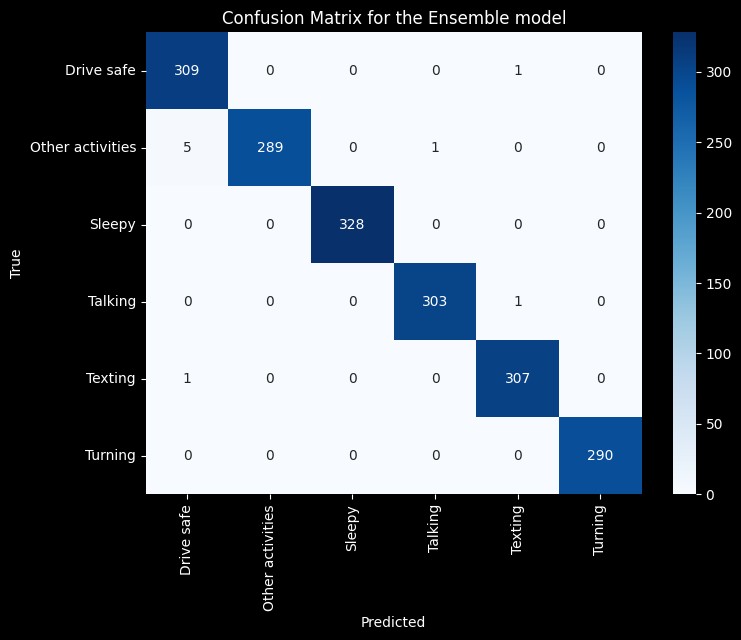

In [64]:
plt.figure(figsize=(8, 6))

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=list(Test_loader.class_indices.keys()), yticklabels=list(Test_loader.class_indices.keys()))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for the Ensemble model')
plt.show()

In [65]:
# Extract training and validation accuracy and loss
Train_acc = history.history['accuracy']
Val_acc = history.history['val_accuracy']
Train_loss = history.history['loss']
Val_loss = history.history['val_loss']
epoch_num = np.arange(1, len(Train_acc) + 1)  # List of epoch numbers
model_name = "Ensemble"  # Replace with your model name if needed


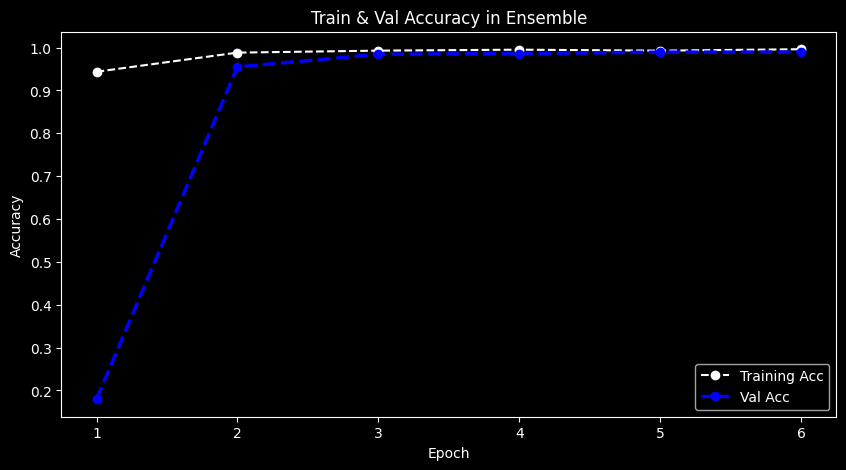

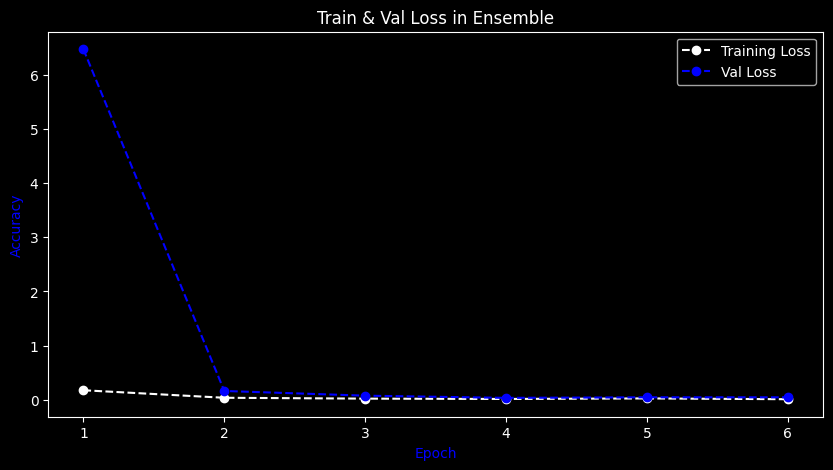

In [66]:
# Plot accuracy
show_accuracy(Train_acc, Val_acc, epoch_num, model_name)

# Plot loss
show_loss(Train_loss, Val_loss, epoch_num, model_name)
